In [1]:
import torch
from torchviz import make_dot
from IPython.display import Image
import sys
import os

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
# for use with subsets
from models.morning_stars_v1.beta.v1_mha_1024_res import TCR_Epitope_Transformer, LazyTCR_Epitope_Dataset, ResidualBlock, Classifier

# Hyperparams (adjust as needed)
embed_dim = 128
num_heads = 8
num_layers = 2
max_tcr_length = 43
max_epitope_length = 43

# Create model instance
model = TCR_Epitope_Transformer(embed_dim=128, num_heads=4, num_layers=2, max_tcr_length=43, max_epitope_length=43, dropout=0.1, classifier_hidden_dim=64)

# Generate dummy input
batch_size = 2
tcr_input = torch.randn(batch_size, max_tcr_length, 1024)
epitope_input = torch.randn(batch_size, max_epitope_length, 1024)

# Forward pass
output = model(tcr_input, epitope_input)

# # Visualize with torchviz
# dot = make_dot(output, params=dict(model.named_parameters()))
# dot.render("diagrams/viz_model_v1_mha_1024", format="png")  # Saves as tcr_epitope_model.png
# Image(filename="diagrams/viz_model_v1_mha_1024.png")


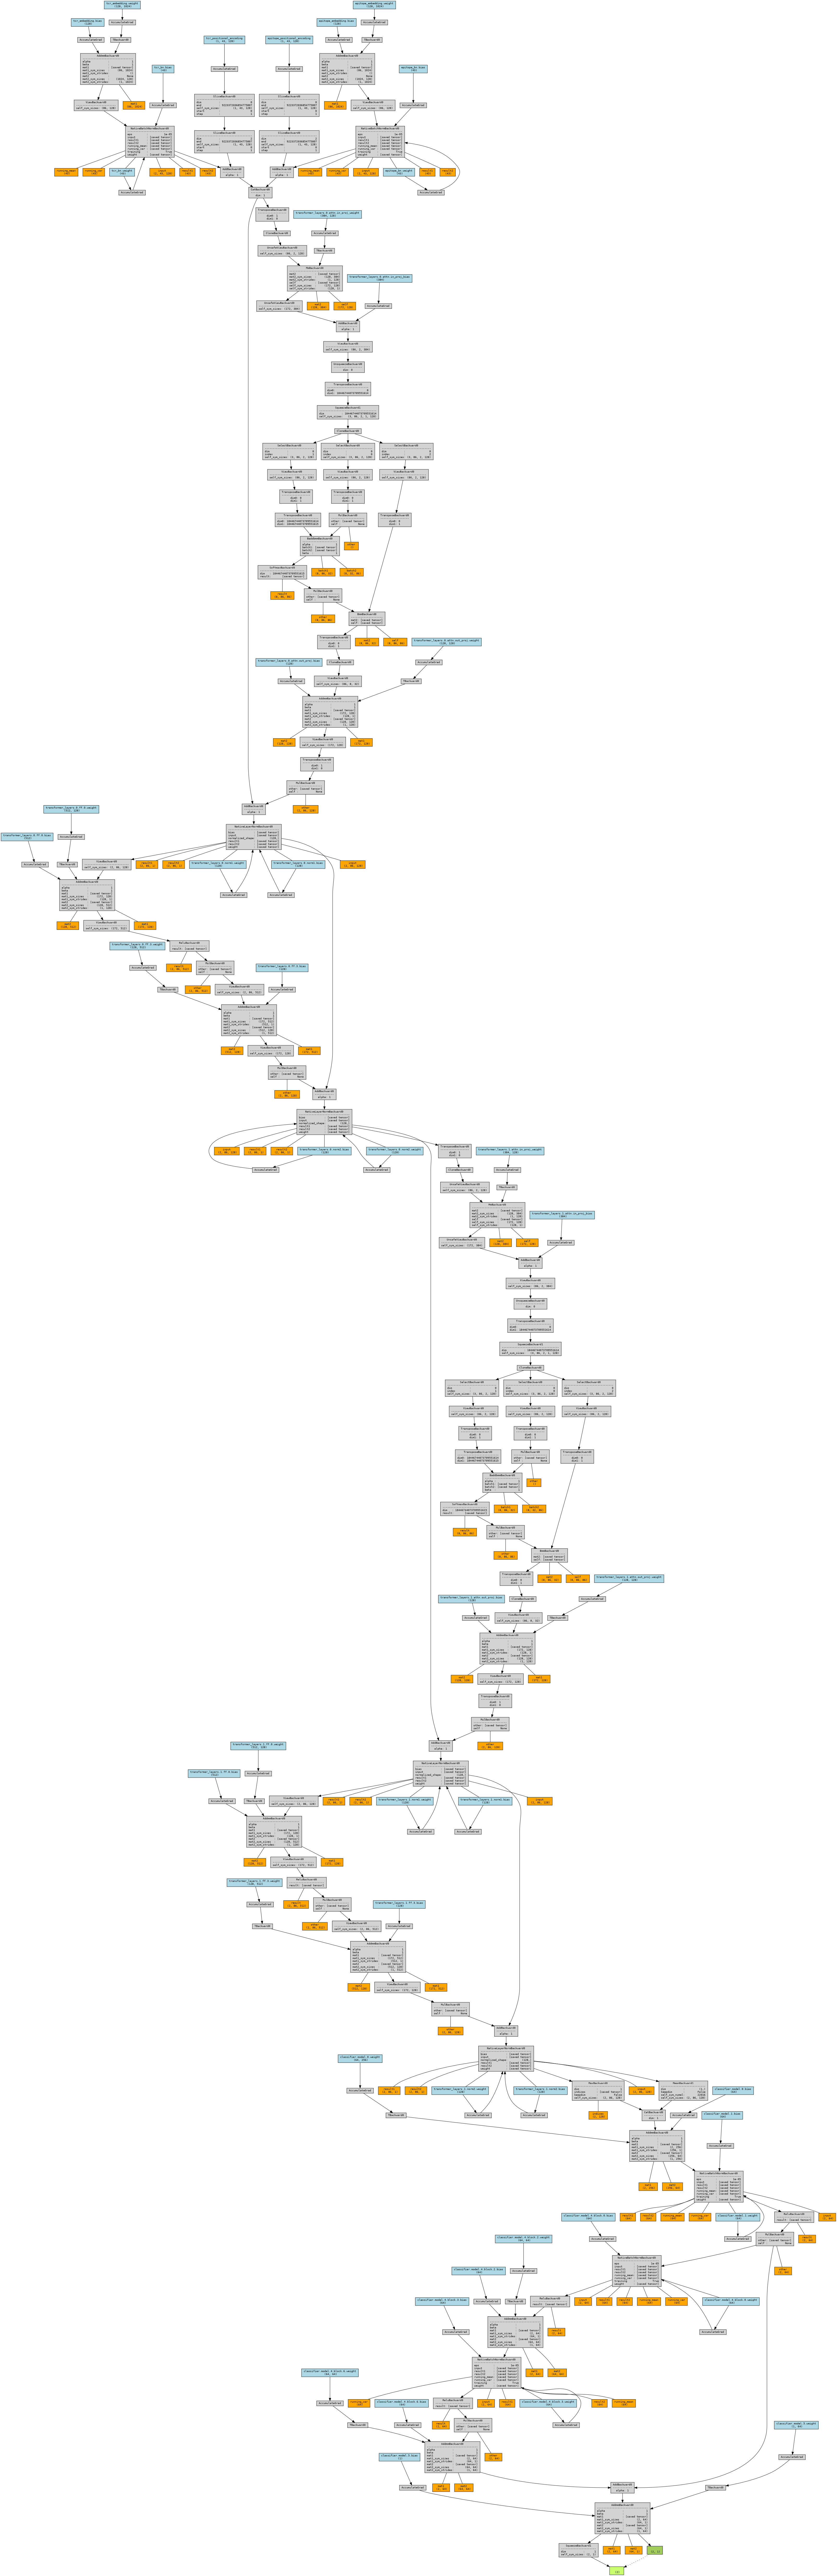

In [11]:
# dot = make_dot(output.detach())
# dot = make_dot(output.detach(), params=dict(model.named_parameters()))
dot = make_dot(output, params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

dot.render("diagrams/viz_model_v1_mha_1024", format="png")  # Saves as tcr_epitope_model.png
Image(filename="diagrams/viz_model_v1_mha_1024.png")

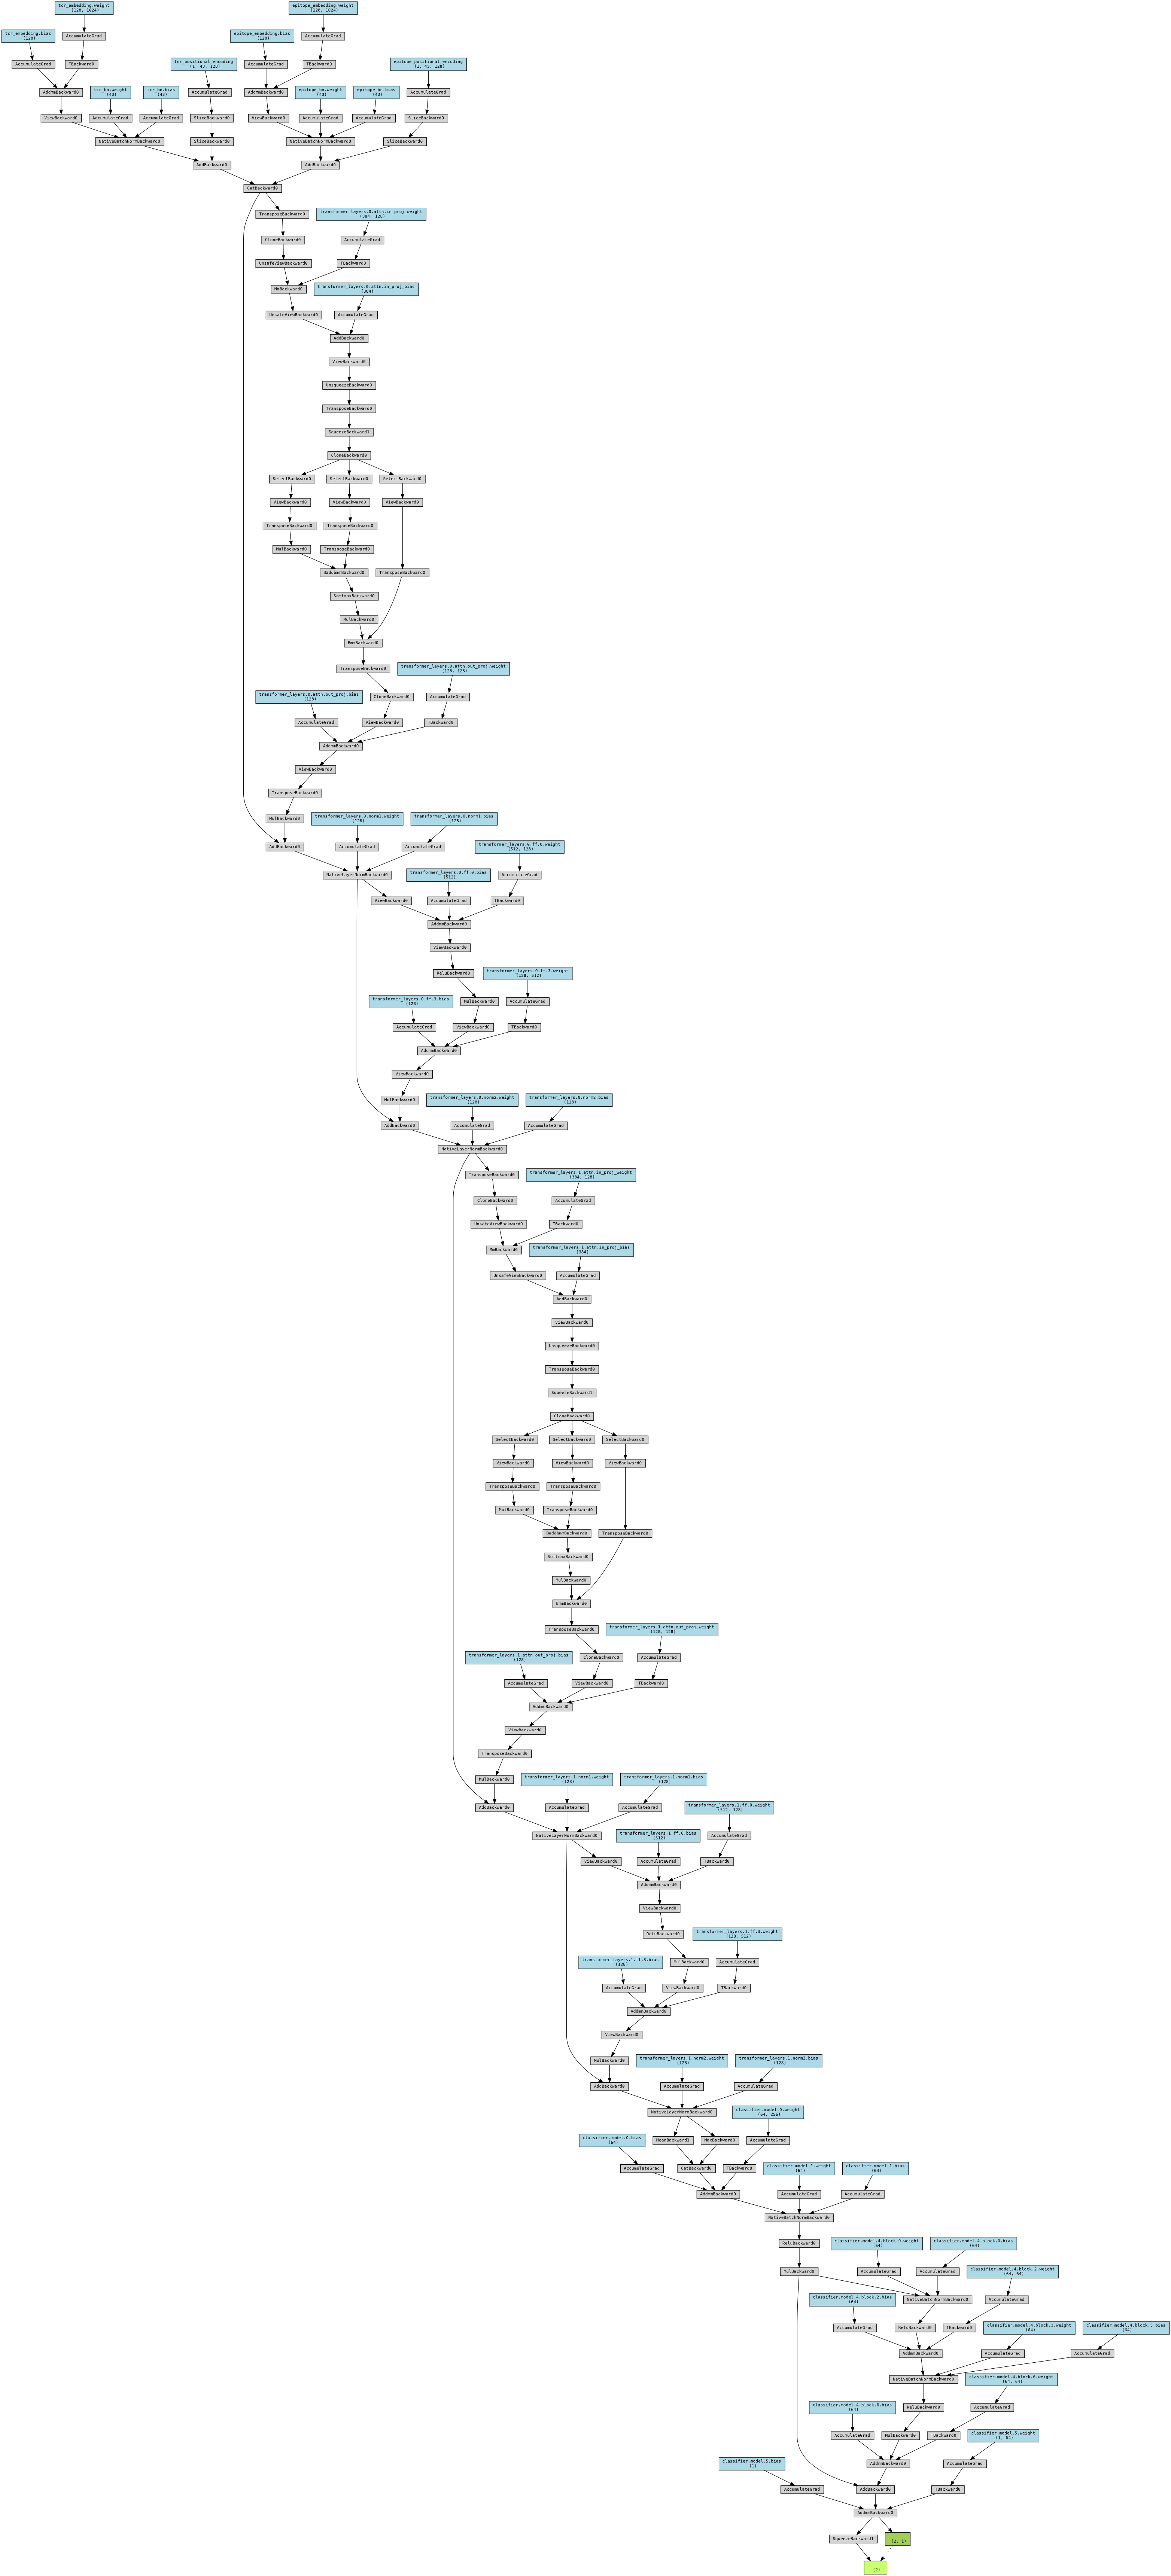

In [6]:
# dot = make_dot(output.detach())
# dot = make_dot(output.detach(), params=dict(model.named_parameters()))
dot = make_dot(output, params=dict(model.named_parameters()), show_attrs=False, show_saved=False)

dot.render("diagrams/viz_model_v1_mha_1024", format="png")  # Saves as tcr_epitope_model.png
Image(filename="diagrams/viz_model_v1_mha_1024.png")

In [8]:
print(dict(model.named_parameters()))
# model.named_modules()

{'tcr_positional_encoding': Parameter containing:
tensor([[[ 0.7575, -0.1056,  1.0499,  ..., -0.4438,  1.6006, -0.6630],
         [ 0.3887,  0.4140, -0.7777,  ...,  1.2514, -0.3879,  1.5419],
         [-0.9336,  0.6093,  0.7747,  ..., -0.7475, -1.3495, -1.5827],
         ...,
         [ 0.1389,  0.6820,  1.2135,  ...,  0.1043, -1.7139, -1.7074],
         [-1.0084,  0.1380,  1.5246,  ..., -1.2351, -2.2056, -1.3070],
         [-1.1365,  0.8026, -1.5764,  ...,  0.1268, -0.1608,  0.5857]]],
       requires_grad=True), 'epitope_positional_encoding': Parameter containing:
tensor([[[-0.9490, -1.7394,  0.4517,  ...,  0.7123, -0.9239,  1.8431],
         [-1.0923, -0.6222,  2.2559,  ..., -0.8033, -0.5378, -1.5776],
         [ 0.1949, -0.6587, -0.8848,  ..., -0.9435,  0.4557, -0.7230],
         ...,
         [ 0.4119, -0.4550, -0.2481,  ...,  1.0745,  0.1812, -0.4981],
         [ 0.3945, -0.1999,  1.6302,  ...,  1.3568,  0.1722, -1.2958],
         [ 0.7987, -1.3938,  0.0779,  ..., -0.9487,  0.382